# Automated Class Attendance Record System

In [ ]:
# The main aim of the project is help the mentor or principle to find the  total number of students in a class.
# Here we consider the data set of 10 images. The algorithm will find the total number of students in each image
# face detection model in haar cascade is used to identify the faces in the image

In [40]:
# importing essential libraries
import pandas as pd
import cv2
import matplotlib.pyplot as plt

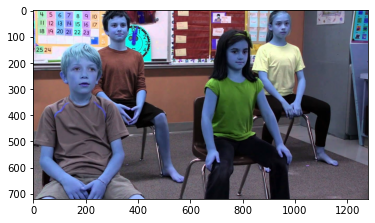

In [41]:
#loading the image for face recognition
img_class = cv2.imread("test_images/sudents12.jpg")
img_class.shape
plt.imshow(img_class)

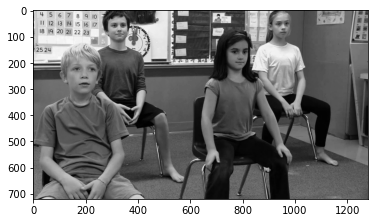

In [42]:
#Convert into gray scale image
gray_img_class = cv2.cvtColor(img_class,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img_class,cmap='gray')

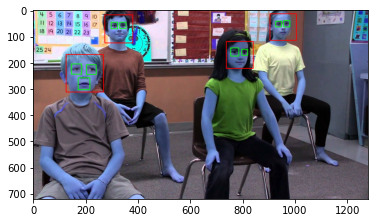

In [43]:
# Detect the rectangle. OpenCV is having haar cascade classifier models object detection. 
# Here we are using frontalface, eye detection xml files to detect the face and two eyes
# Here face_cascade and eye_cascade will act as the classifier to detect the face and two eyes in the image

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img_class,1.3,5)
faces    
cv2.destroyAllWindows()
for (x,y,w,h)  in faces:
    face_img = cv2.rectangle(img_class,(x,y),(x+h,y+h),(255,0,0),2)
    roi_gray = gray_img_class[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(img_class,cmap='gray')
plt.show()

In [44]:
# data paths are initilized
path_to_data = "./dataset/classAttendance/ClassRoomImages/"
path_to_cr_data = "./dataset/classAttendance/cropped/"

In [45]:
#Create a img_dirs array which saves the path of all the folders in dataset folder
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    print(entry.path)
    img_dirs.append(entry.path)
#print(img_dirs)

./dataset/classAttendance/ClassRoomImages/class10.jpg
./dataset/classAttendance/ClassRoomImages/class2.jpg
./dataset/classAttendance/ClassRoomImages/class3.jpg
./dataset/classAttendance/ClassRoomImages/class4.jpg
./dataset/classAttendance/ClassRoomImages/class5.jpg
./dataset/classAttendance/ClassRoomImages/class6.jpg
./dataset/classAttendance/ClassRoomImages/class9.jpg
['./dataset/classAttendance/ClassRoomImages/class10.jpg', './dataset/classAttendance/ClassRoomImages/class2.jpg', './dataset/classAttendance/ClassRoomImages/class3.jpg', './dataset/classAttendance/ClassRoomImages/class4.jpg', './dataset/classAttendance/ClassRoomImages/class5.jpg', './dataset/classAttendance/ClassRoomImages/class6.jpg', './dataset/classAttendance/ClassRoomImages/class9.jpg']


In [70]:
# print(img_dirs)
f= open("output.txt","w+")
for img in img_dirs:
    # get_cropped_image_if_2_eyes function gives the cropped facial image if two eyes are visible
    roi_color = get_cropped_image_if_2_eyes(img)
    print(roi_color)
    f.write(img+" ")
    f.write(str(roi_color)+"\n")
f.close()

[[258   7  62  62]
 [132  31  59  59]
 [413  33  64  64]
 [213  58  63  63]
 [357  66  65  65]]
5
[[1286  141   65   65]
 [ 593  106   47   47]
 [ 392  109   43   43]
 [ 904  112   59   59]]
4
[[282 171  72  72]
 [697 155  76  76]
 [ 76 171 102 102]
 [324  62  48  48]
 [677  74  36  36]]
5
[[267 153  62  62]
 [264  72  52  52]
 [656 141  93  93]
 [406  93  51  51]
 [330 186  81  81]
 [ 47 116  81  81]
 [ 37 205 102 102]
 [838 144  75  75]]
8
[[647 292 137 137]
 [481 298  74  74]
 [366 289 100 100]
 [139 361 131 131]]
4
[[ 855  296  435  435]
 [1323  266  487  487]
 [ 331  295  549  549]
 [1848  262  534  534]]
4
[[263  49  98  98]
 [168  70  89  89]
 [337  82  89  89]]
3


In [47]:
#face portion is highlighted by drawing a rectangle. Red value is selected from the (R,G,B) value (255,0,0)
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    print(faces)
    return(len(faces))    
        

In [25]:
#Reference : https://docs.opencv.org/master/db/d28/tutorial_cascade_classifier.html